In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 13.6MB/s 
     |████████████████████████████████| 6.5MB 19.9MB/s 
     |████████████████████████████████| 14.8MB 320kB/s 


In [2]:
!pip install folium

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
import os

In [4]:
departements = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/ec305e78-f231-4a77-b32c-1e0c4c67615e')

In [5]:
dpt = departements[departements['code_departement'].isin(['75', '77', '78', '91', '92', '93', '94', '95' ])]

In [6]:
amenagements = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/33d97256-1829-41d3-b7b5-56e490846b85")
#https://www.data.gouv.fr/fr/datasets/amenagements-velo-en-ile-de-france-2/#_

In [ ]:
am.head(1)

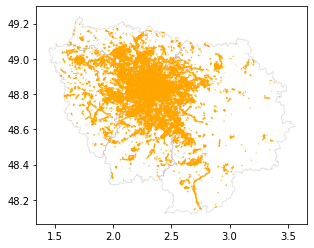

In [7]:
fig, ax = plt.subplots()
dpt.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.1)
amenagements.plot(ax=ax, color = 'orange')
plt.show()

In [8]:
#pour simplifier on elève les pistes qui ne sont pas à double sens (on perd à peu près 1000 observations)
am = amenagements.dropna(subset = ['ad','ag']) 

In [9]:
#on simplifie les types de pistes
conditionlist = [
                 (am['ad'].isin(['chemin service site propre uni','chemin dedie uni','autre chemin velo uni'])), 
                 (am['ad'].isin(['cheminement trottoir uni','piste trottoir uni'])),
                 (am['ad'].isin(['piste uni', 'piste bi'])),
                 (am['ad'].isin(['bande uni', 'bande bi', 'DSC bande'])),
                 (am['ad'].isin(['voie verte uni'])),
                 (am['ad'].isin(['voie bus uni']))]
choicelist = ['voie propre', 'trottoir', 'piste', 'bande', 'voie verte', 'voie bus']
am['type'] = np.select(conditionlist, choicelist, default = 'Not Specified')

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


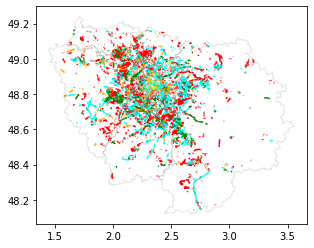

In [10]:
fig, ax = plt.subplots()
dpt.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.1)
am[am['type'] == 'voie propre'].plot(ax=ax,color = 'red')
am[am['type'] == 'piste'].plot(ax=ax, color = 'cyan')
am[am['type'] == 'voie verte'].plot(ax=ax, color = 'green')
am[am['type'] == 'voie bus'].plot(ax=ax, color = 'yellow')
am[am['type'] == 'trottoir'].plot(ax=ax, color = 'grey')
am[am['type'] == 'bande'].plot(ax=ax, color = 'orange')
plt.show()